In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
data_dir = os.chdir('/content/gdrive/MyDrive/SY Sem-2/DS/CP/DS CP Dataset/trim_fruits/trim_fruits')

In [ ]:
from PIL.Image import new
def prepare(filepath):
    IMG_SIZE = 50
    img_normal = cv2.imread(filepath)
    cv2_imshow(img_normal)
    #img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    #plt.imshow(img_array)
    #plt.show()
    new_array = cv2.resize(img_normal, (IMG_SIZE, IMG_SIZE))
    #plt.imshow(new_array)
    cv2_imshow(new_array)

    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
prepare("/content/gdrive/MyDrive/SY Sem-2/DS/CP/DS CP Dataset/trim_fruits/trim_fruits/dataset/train/freshapples/Screen Shot 2018-06-08 at 5.00.12 PM.png")

In [ ]:
training_data = []
DATADIR = "/content/gdrive/MyDrive/SY Sem-2/DS/CP/DS CP Dataset/trim_fruits/trim_fruits/dataset/train"
IMG_SIZE = 50
CATEGORIES = ["freshapples","freshbanana","freshoranges","rottenapples","rottenbanana","rottenoranges"]

In [ ]:
def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        
        for img in tqdm(os.listdir(path)):         
                try:
                    img_array = cv2.imread(os.path.join(path,img))
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 
                    training_data.append([new_array, class_num])
                    
                except Exception as e:
                    pass
           
create_training_data()

print(len(training_data))

100%|██████████| 1400/1400 [00:29<00:00, 48.12it/s] 


8400


In [ ]:
X_train = []
y_train = []
import numpy as np
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)

In [ ]:
testing_data = []
DATADIR = "/content/gdrive/MyDrive/SY Sem-2/DS/CP/DS CP Dataset/trim_fruits/trim_fruits/dataset/test"
IMG_SIZE = 50
CATEGORIES = ["freshapples","freshbanana","freshoranges","rottenapples","rottenbanana","rottenoranges"]

In [ ]:
def create_testing_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        
        for img in tqdm(os.listdir(path)):         
                try:
                    img_array = cv2.imread(os.path.join(path,img))
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 
                    testing_data.append([new_array, class_num])
                    
                except Exception as e:
                    pass
           
create_testing_data()

print(len(testing_data))

100%|██████████| 403/403 [00:06<00:00, 61.04it/s] 

2698


In [ ]:
X_test = []
y_test = []
import numpy as np
for features,label in training_data:
    X_test.append(features)
    y_test.append(label)

In [ ]:
X_train = np.array(X_train)
X_train = X_train.reshape(-1,50,50,3)

X_test = np.array(X_train)
X_test = X_train.reshape(-1,50,50,3)

y_test = np.array(y_test)
y_train = np.array(y_train)

In [ ]:
batch_size = 16
nb_classes =6
nb_epochs = 20
img_rows, img_columns = 50,50
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape = X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6,  activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_data=(X_test,y_test))

Epoch 1/20
525/525 [==============================] - 36s 68ms/step - loss: 0.7769 - accuracy: 0.7132 - val_loss: 0.5480 - val_accuracy: 0.7908
Epoch 2/20
525/525 [==============================] - 36s 68ms/step - loss: 0.5979 - accuracy: 0.7813 - val_loss: 0.4157 - val_accuracy: 0.8435
Epoch 3/20
525/525 [==============================] - 35s 67ms/step - loss: 0.5237 - accuracy: 0.8054 - val_loss: 0.4495 - val_accuracy: 0.8330
Epoch 4/20
525/525 [==============================] - 35s 67ms/step - loss: 0.4924 - accuracy: 0.8194 - val_loss: 0.3395 - val_accuracy: 0.8745
Epoch 5/20
525/525 [==============================] - 35s 67ms/step - loss: 0.4625 - accuracy: 0.8295 - val_loss: 0.3208 - val_accuracy: 0.8838
Epoch 6/20
525/525 [==============================] - 35s 68ms/step - loss: 0.4161 - accuracy: 0.8413 - val_loss: 0.3174 - val_accuracy: 0.8785
Epoch 7/20
525/525 [==============================] - 35s 67ms/step - loss: 0.4086 - accuracy: 0.8451 - val_loss: 0.2656 - val_accuracy:

In [ ]:
model.save("DS Fruit Freshness Detection Project")

In [ ]:
from tensorflow import keras
model = keras.models.load_model("DS Fruit Freshness Detection Project")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)             

(20,)
(20,)


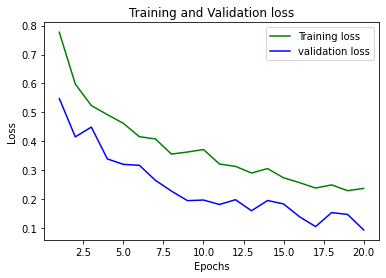

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
print(np.shape(loss_train))
print(np.shape(loss_val))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

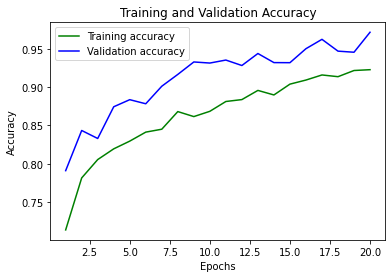

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

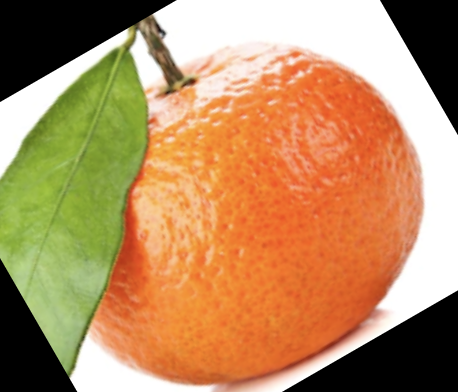

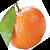

In [ ]:
img = prepare("/content/gdrive/MyDrive/SY Sem-2/DS/CP/DS CP Dataset/trim_fruits/trim_fruits/dataset/test/freshoranges/rotated_by_30_Screen Shot 2018-06-12 at 11.58.28 PM.png")

In [ ]:
result = model.predict(img)
print(np.argmax(result))

2


In [ ]:
DATADIR = "/content/gdrive/MyDrive/SY Sem-2/DS/CP/DS CP Dataset/trim_fruits/trim_fruits/dataset/test"
CATEGORIES = ["freshapples","freshbanana","freshoranges","rottenapples","rottenbanana","rottenoranges"]

In [ ]:
from PIL.Image import new
def prepare_for_test(filepath):
    IMG_SIZE = 50
    img_normal = cv2.imread(filepath)
    img_array = cv2.imread(filepath)
    img_array = img_array.resize(50,50)
    #plt.imshow(img_array)
    #plt.show()

    return img_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
pred = []
pred_class = []
true_pred = []
i = 0
j = 0
for i in range(0,1164):
  true_pred.append(0)

for j in range(0,1534):
  true_pred.append(1)

              

In [ ]:

for category in CATEGORIES: 

  path = os.path.join(DATADIR,category)  
  for img in tqdm(os.listdir(path)):     
    try:
      img_array = cv2.imread(os.path.join(path,img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 
      pred.append(np.argmax(model.predict(new_array)))
                    
    except Exception as e:
                    pass             

100%|██████████| 403/403 [00:28<00:00, 14.27it/s]


In [ ]:
for i in pred:
  if i == 0 or i == 1 or i == 2:
    pred_class.append(0)
  else: 
    pred_class.append(1)

In [ ]:
print(pred)
print(pred_class)
print(true_pred)


[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(true_pred,pred_class, labels=[0,1])
print('Confusion matrix : \n',matrix)

TP, FN, FP, TN = confusion_matrix(true_pred,pred_class,labels=[0,1]).reshape(-1)
print('Outcome values : \n', TP, FN, FP, TN)

precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN)/(TP+FN+FP+TN)
f_1 = (2*TP)/((2*TP)+FP+FN)
print("The measures of accuracy are: \nPrecision: ",precision,"\nRecall: ",recall,"\nAccuracy: ",accuracy,"\nF_1 Score: ",f_1)

Confusion matrix : 
 [[1104   60]
 [ 102 1432]]
Outcome values : 
 1104 60 102 1432
The measures of accuracy are: 
Precision:  0.9154228855721394 
Recall:  0.9484536082474226 
Accuracy:  0.9399555226093402 
F_1 Score:  0.9316455696202531
